# WORD CLOUD data analysis.

In [2]:
# import necesary libruaries
import pandas as pd
import numpy as np
import nltk
import webbrowser
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import numpy as np

In [5]:
# Load the dataset
data = pd.read_csv(r"C:\Users\USER\Downloads\Play Store Data.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data1=pd.read_csv(r"C:\Users\USER\Downloads\User Reviews.csv")

In [7]:
data1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
# merge two data sets
merged=pd.merge(data,data1,on='App',how='inner')
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [10]:
merged.dropna(inplace=True)

In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72566 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Category                72566 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72566 non-null  object 
 4   Size                    72566 non-null  object 
 5   Installs                72566 non-null  object 
 6   Type                    72566 non-null  object 
 7   Price                   72566 non-null  object 
 8   Content Rating          72566 non-null  object 
 9   Genres                  72566 non-null  object 
 10  Last Updated            72566 non-null  object 
 11  Current Ver             72566 non-null  object 
 12  Android Ver             72566 non-null  object 
 13  Translated_Review       72566 non-null  object 
 14  Sentiment               72566 non-null  ob

In [12]:
# removng unwanted charectors like , . ^ etc.
def remove_special_charectors(text):
    return re.sub(r'[^A-Za-z\s]','',text)
merged['Translated_Review_1']=merged["Translated_Review"].apply(remove_special_charectors)  

In [13]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review_1
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,A kids excessive ads The types ads allowed app...
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,It bad
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,like
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,I love colors inspyering
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,I hate


In [14]:
# trancelating uppercase to lowercase
merged['Translated_Review_1'] = merged['Translated_Review_1'].str.lower()

In [15]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review_1
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,a kids excessive ads the types ads allowed app...
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,it bad
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,like
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,i love colors inspyering
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,i hate


In [16]:
# if you dont have nltk in your system install it
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
#pip install spacy

In [18]:
# toeanization 
nltk.download("punkt")
merged["tokenized_review"]=merged["Translated_Review_1"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review_1,tokenized_review
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,a kids excessive ads the types ads allowed app...,"[a, kids, excessive, ads, the, types, ads, all..."
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,it bad,"[it, bad]"
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,like,[like]
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,i love colors inspyering,"[i, love, colors, inspyering]"
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,i hate,"[i, hate]"


In [20]:
# lemmatization( lemmatized review)
nltk.download("wordnet")
nltk.download("omw-1.4")
lemmatizer = WordNetLemmatizer()
merged["lemmatized_note"]=merged["tokenized_review"].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Translated_Review_1,tokenized_review,lemmatized_note
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,a kids excessive ads the types ads allowed app...,"[a, kids, excessive, ads, the, types, ads, all...","[a, kid, excessive, ad, the, type, ad, allowed..."
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,it bad,"[it, bad]","[it, bad]"
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,like,[like],[like]
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,i love colors inspyering,"[i, love, colors, inspyering]","[i, love, color, inspyering]"
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,i hate,"[i, hate]","[i, hate]"


In [22]:
# lemmatization(lemmatized note) 
nltk.download("stopwords")
stop_word = set(stopwords.words("english"))
merged["lemmatized_note"]=merged["lemmatized_note"].apply(lambda x: [word for word in x if word not in stop_word])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


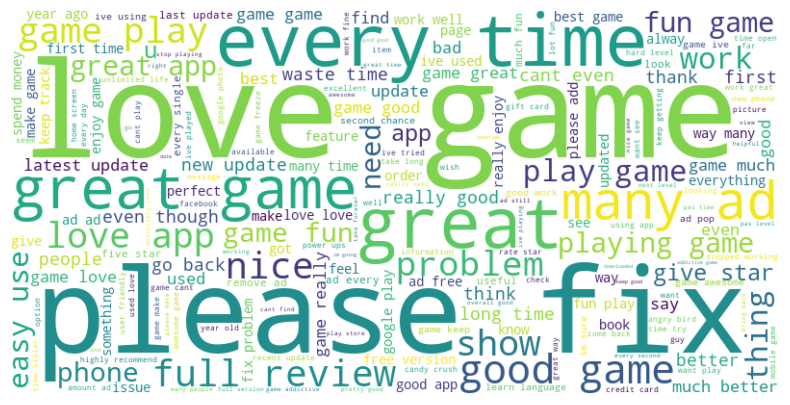

In [23]:
#  WORD CLOUD in visualization 

all_words= ' '.join([' '.join(words) for words in merged['lemmatized_note']])

wordcloud = WordCloud(width=800,height=400,background_color="white").generate(all_words)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")# no axis for the word cloud
plt.show()

In [24]:
# to convert WORD CLOUD shape in different immages 
# need to inatsll pillow

!pip install Pillow


In [25]:
from PIL import Image
import numpy as np


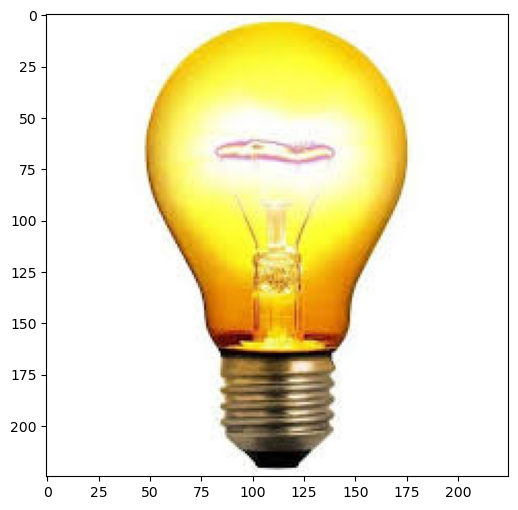

In [26]:

#importing the image from divice files 

masked_image_path=r"C:\Users\USER\Documents\New folder (2)\OneDrive\Pictures\download.jpg"
ashok=np.array(Image.open(masked_image_path))
plt.figure(figsize=(20,6))
plt.imshow(ashok)

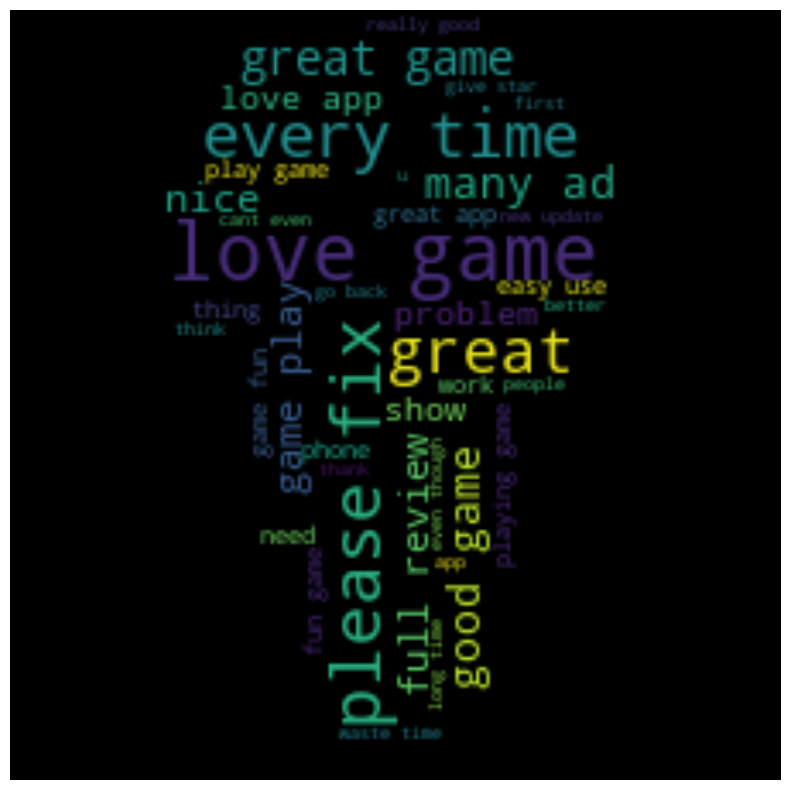

In [27]:
#convert the WORD CLOUD into specific shape 

plt.figure(figsize=(20,10))
word_cloud2= WordCloud(background_color='black',mask=ashok,
                       width=3800,height=2400).generate(all_words)
plt.imshow(word_cloud2,interpolation="bilinear")
plt.axis("off")
plt.show()